In [10]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dropout

#stock_data = yf.download('AAPL', start='2016-01-01', end='2021-10-01')
#stock_data.head()

In [11]:
#stock_data = yf.download('AAPL', start='2016-01-01', end='2021-10-01')
stock_data = yf.download('AAPL', start='2016-01-01', end='2021-10-01')

stock_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.041483,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.439024,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,22.980330,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.010447,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.126844,283192000


Text(0, 0.5, 'Prices ($)')

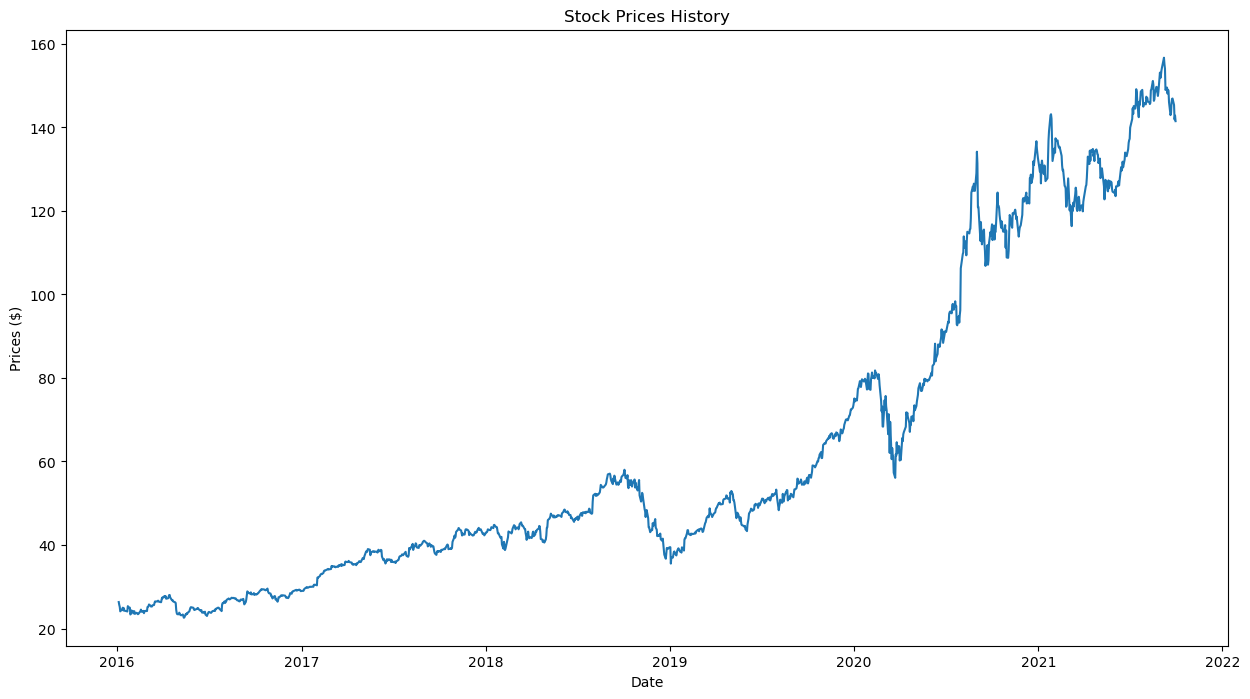

In [3]:

plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(stock_data['Close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

In [72]:
stock_diff = stock_data.diff()
stock_diff.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,0.785000,0.119999,0.102501,-0.660000,-0.602463,-47433600.0
2016-01-06,-1.297501,-0.869999,-0.635000,-0.502501,-0.458696,50665600.0
2016-01-07,-0.469999,-0.560001,-0.860001,-1.062500,-0.969872,50548000.0
2016-01-08,-0.032499,-0.254999,0.082500,0.127501,0.116385,-41185600.0


Text(0, 0.5, 'Prices ($)')

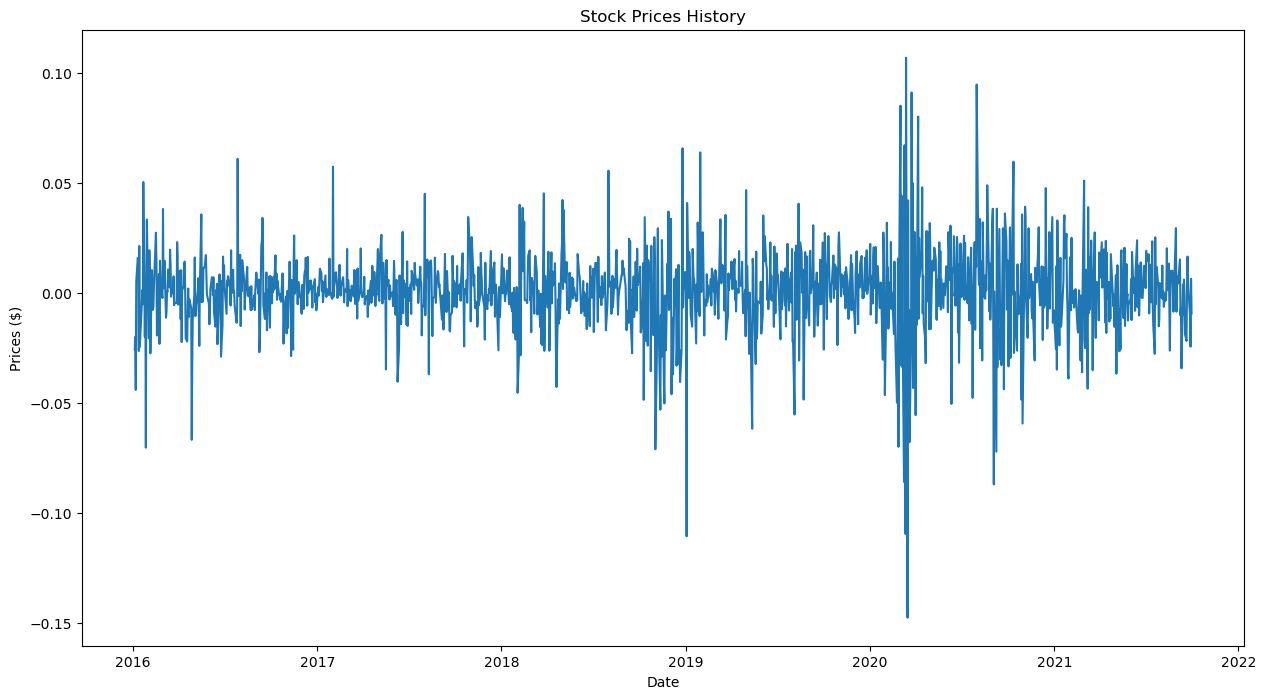

In [79]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(stock_data['%diff'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

In [73]:
stock_data["Close_diff"]=stock_diff["Close"]

In [4]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.041481,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.439022,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,22.980326,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.010452,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.126841,283192000
...,...,...,...,...,...,...
2021-09-24,145.660004,147.470001,145.559998,146.919998,145.435837,53477900
2021-09-27,145.470001,145.960007,143.820007,145.369995,143.901474,74150700
2021-09-28,143.250000,144.750000,141.690002,141.910004,140.476440,108972300


In [76]:
stock_data = stock_data.dropna()
stock_data["%diff"] = stock_data["Close_diff"]/stock_data["Close"]

In [6]:
close_prices = stock_data['Close']
values = close_prices_change.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [9]:
x_train.shape

(1098, 60, 1)

In [81]:

test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [82]:

model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 60, 100)           40800     
                                                                 
 lstm_13 (LSTM)              (None, 100)               80400     
                                                                 
 dense_6 (Dense)             (None, 25)                2525      
                                                                 
 dense_7 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123751 (483.40 KB)
Trainable params: 123751 (483.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [83]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=5)


Epoch 1/5
1097/1097 [==============================] - 22s 18ms/step - loss: 0.0081
Epoch 2/5
1097/1097 [==============================] - 20s 18ms/step - loss: 0.0062
Epoch 3/5
1097/1097 [==============================] - 20s 18ms/step - loss: 0.0058
Epoch 4/5
1097/1097 [==============================] - 20s 19ms/step - loss: 0.0056
Epoch 5/5
1097/1097 [==============================] - 21s 19ms/step - loss: 0.0057


In [84]:

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

10/10 [==============================] - 1s 19ms/step


0.007415402704279568

In [89]:
y_test.sum()

0.18668701933972692

In [88]:
predictions.sum()

2.3297381

In [85]:
rmse = np.sqrt(np.mean(-y_test)**2)
rmse

0.0006459758454661831

C:\Users\yotam\AppData\Local\Temp\ipykernel_8124\569253170.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


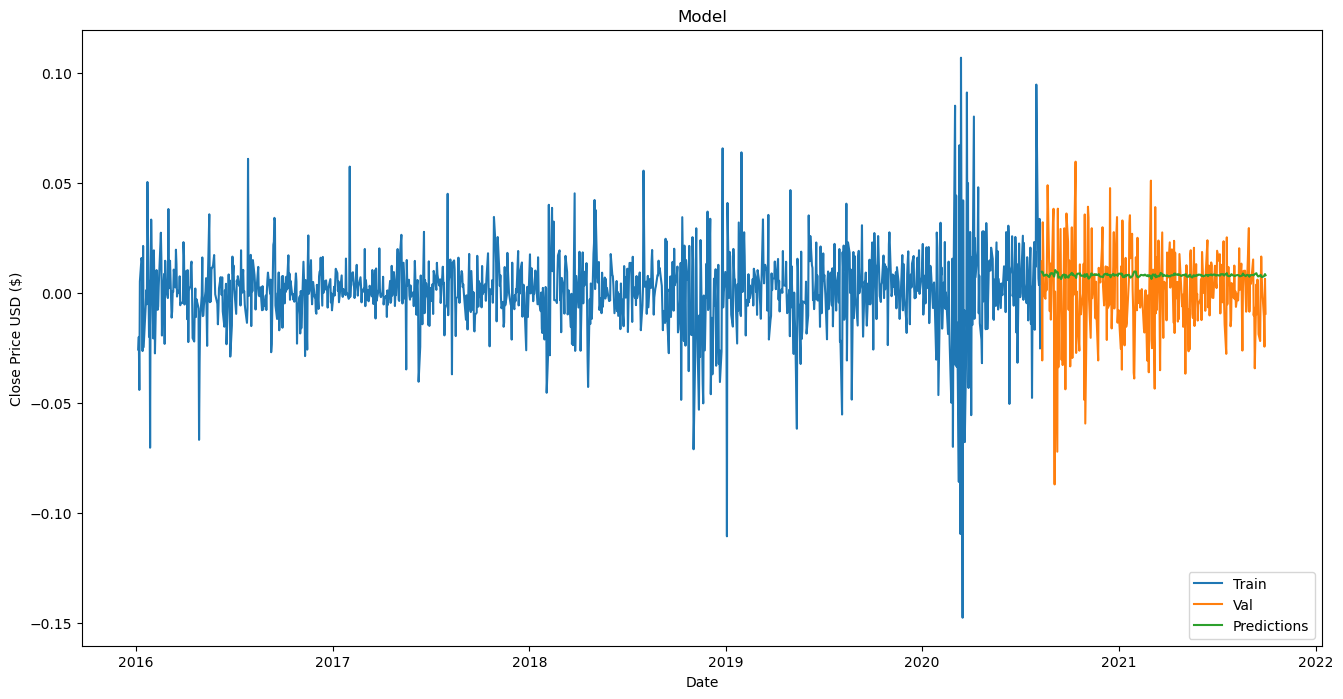

In [86]:

data = stock_data.filter(['%diff'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['%diff', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [104]:
y_train

array([1., 1., 0., ..., 1., 1., 0.])

In [108]:
model2 = keras.Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model2.add(layers.LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model2.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model2.add(layers.LSTM(units = 100, return_sequences = True))
model2.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model2.add(layers.LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model2.add(layers.LSTM(units = 50))
model2.add(layers.Dense(units = 1))


# Compiling the RNN
model2.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model2.fit(x_train, y_train, epochs = 30, batch_size = 32)

Epoch 1/30
35/35 [==============================] - 9s 78ms/step - loss: 0.2706
Epoch 2/30
35/35 [==============================] - 3s 77ms/step - loss: 0.2519
Epoch 3/30
35/35 [==============================] - 3s 79ms/step - loss: 0.2523
Epoch 4/30
35/35 [==============================] - 3s 79ms/step - loss: 0.2516
Epoch 5/30
35/35 [==============================] - 3s 79ms/step - loss: 0.2514
Epoch 6/30
35/35 [==============================] - 3s 83ms/step - loss: 0.2514
Epoch 7/30
35/35 [==============================] - 3s 82ms/step - loss: 0.2583
Epoch 8/30
35/35 [==============================] - 3s 83ms/step - loss: 0.2508
Epoch 9/30
35/35 [==============================] - 3s 85ms/step - loss: 0.2500
Epoch 10/30
35/35 [==============================] - 3s 84ms/step - loss: 0.2492
Epoch 11/30
35/35 [==============================] - 3s 84ms/step - loss: 0.2500
Epoch 12/30
35/35 [==============================] - 3s 84ms/step - loss: 0.2526
Epoch 13/30
35/35 [==================

KeyboardInterrupt: 

In [91]:
print(f"base line: {np.sqrt(np.mean(-y_test)**2)}")


base line: 0.0006459758454661831


In [92]:

predictions = model2.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

10/10 [==============================] - 1s 22ms/step


0.0009673537736046359

C:\Users\yotam\AppData\Local\Temp\ipykernel_8124\569253170.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


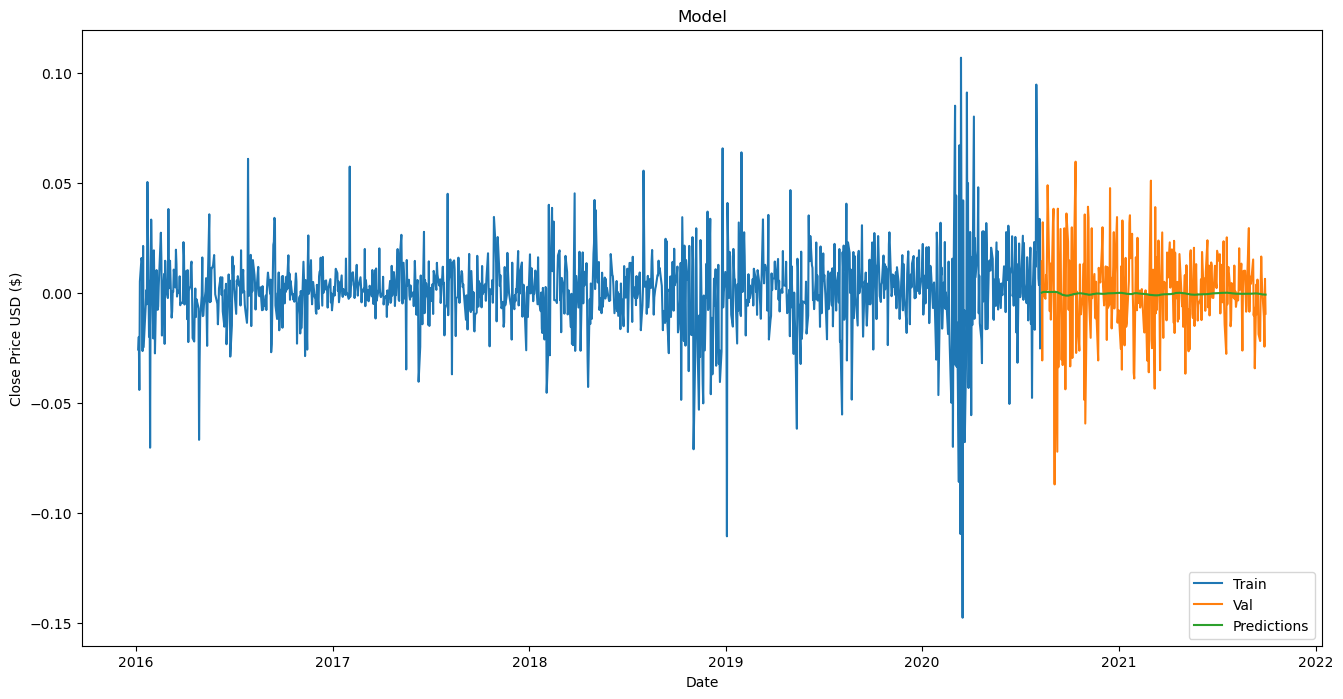

In [93]:

data = stock_data.filter(['%diff'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['%diff', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [95]:
stock_data

,Open,High,Low,Close,Adj Close,Volume,Close_diff,%diff,up
Date,,,,,,,,,
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.439024,223164000,-0.660000,-0.025703,0
2016-01-06,25.139999,25.592501,24.967501,25.174999,22.980328,273829600,-0.502501,-0.019960,0
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.010456,324377600,-1.062500,-0.044064,0
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.126841,283192000,0.127501,0.005260,1
2016-01-11,24.742500,24.764999,24.334999,24.632500,22.485125,198957600,0.392500,0.015934,1
...,...,...,...,...,...,...,...,...,...
2021-09-24,145.660004,147.470001,145.559998,146.919998,145.435837,53477900,0.089996,0.000613,1
2021-09-27,145.470001,145.960007,143.820007,145.369995,143.901474,74150700,-1.550003,-0.010662,0
2021-09-28,143.250000,144.750000,141.690002,141.910004,140.476425,108972300,-3.459991,-0.024382,0


In [94]:
stock_data["up"] = np.where(stock_data['%diff']>0,1,0) 

In [96]:
dir_prices = stock_data['up']
values = dir_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [97]:

test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [98]:
model2 = keras.Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model2.add(layers.LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model2.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model2.add(layers.LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model2.add(layers.LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model2.add(layers.LSTM(units = 50))
model2.add(Dropout(0.2))
# Adding the output layer
model2.add(layers.Dense(units = 1))

# Compiling the RNN
model2.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model2.fit(x_train, y_train, epochs = 40, batch_size = 32)

Epoch 1/40
35/35 [==============================] - 8s 70ms/step - loss: 0.2793
Epoch 2/40
35/35 [==============================] - 2s 65ms/step - loss: 0.2576
Epoch 3/40
35/35 [==============================] - 2s 68ms/step - loss: 0.2595
Epoch 4/40
35/35 [==============================] - 2s 70ms/step - loss: 0.2534
Epoch 5/40
35/35 [==============================] - 2s 68ms/step - loss: 0.2608
Epoch 6/40
35/35 [==============================] - 3s 74ms/step - loss: 0.2502
Epoch 7/40
35/35 [==============================] - 3s 73ms/step - loss: 0.2552
Epoch 8/40
35/35 [==============================] - 3s 74ms/step - loss: 0.2556
Epoch 9/40
35/35 [==============================] - 3s 74ms/step - loss: 0.2555
Epoch 10/40
35/35 [==============================] - 2s 69ms/step - loss: 0.2524
Epoch 11/40
35/35 [==============================] - 2s 69ms/step - loss: 0.2561
Epoch 12/40
35/35 [==============================] - 3s 72ms/step - loss: 0.2537
Epoch 13/40
35/35 [==================

In [102]:
print(f"base line: {np.sqrt(np.mean(1-y_test)**2)}")


base line: 0.4809688581314879


In [107]:
predictions

array([[0.5333095 , 0.53372425, 0.53458816, ..., 0.53403956, 0.5335421 ,
        0.53323555],
       [0.53329515, 0.53372306, 0.5345847 , ..., 0.53402984, 0.5335383 ,
        0.53322697],
       [0.53330475, 0.5337336 , 0.53459483, ..., 0.5340453 , 0.53354347,
        0.5332405 ],
       ...,
       [0.5333018 , 0.5337418 , 0.534604  , ..., 0.53404766, 0.5335488 ,
        0.53324276],
       [0.533295  , 0.53375465, 0.534609  , ..., 0.5340486 , 0.5335528 ,
        0.5332474 ],
       [0.5332832 , 0.53374827, 0.534605  , ..., 0.5340403 , 0.5335464 ,
        0.53323823]], dtype=float32)

In [106]:

predictions = model2.predict(x_test)
predictions = scaler.inverse_transform(predictions)
pred = np.where(predictions>0.5,1,0)
rmse = np.sqrt(np.mean(pred - y_test)**2)
rmse

10/10 [==============================] - 1s 23ms/step


ValueError: operands could not be broadcast together with shapes (289,50) (289,) 

C:\Users\yotam\AppData\Local\Temp\ipykernel_8124\569253170.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


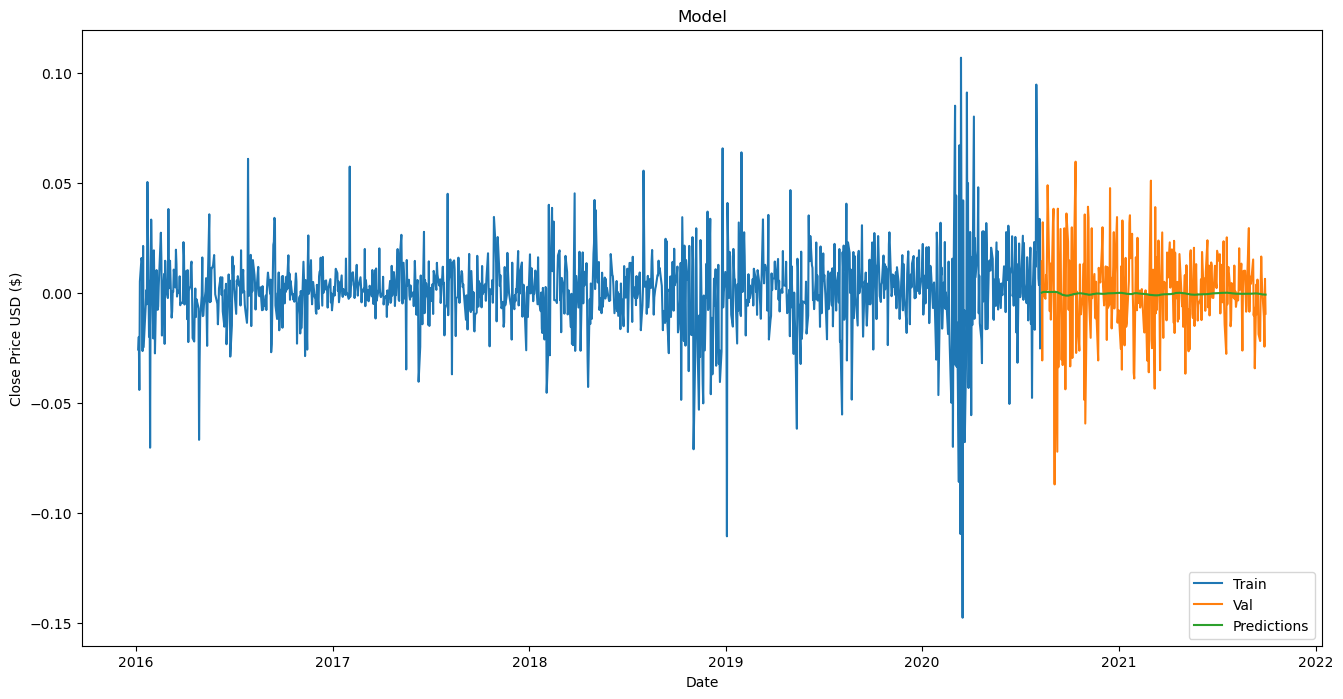

In [93]:

data = stock_data.filter(['%diff'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['%diff', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [34]:

model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 60, 100)           40800     
                                                                 
 lstm_11 (LSTM)              (None, 100)               80400     
                                                                 
 dense_4 (Dense)             (None, 25)                2525      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123751 (483.40 KB)
Trainable params: 123751 (483.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=5)


Epoch 1/5
1097/1097 [==============================] - 22s 18ms/step - loss: 0.2627
Epoch 2/5
1097/1097 [==============================] - 21s 19ms/step - loss: 0.2545
Epoch 3/5
1097/1097 [==============================] - 22s 20ms/step - loss: 0.2513
Epoch 4/5
1097/1097 [==============================] - 20s 19ms/step - loss: 0.2522
Epoch 5/5
1097/1097 [==============================] - 21s 19ms/step - loss: 0.2520


In [43]:
print(f"base line: {np.sqrt(np.mean(1-y_test)**2)}")


base line: 0.4809688581314879


In [56]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
pred = np.where(predictions>0.5,1,0)
pred = scaler.inverse_transform(pred)


10/10 [==============================] - 0s 18ms/step


In [57]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.03140663811904749

In [59]:
rmse = np.sqrt(np.mean(pred - y_test)**2)
rmse

0.4809688581314879

In [37]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
pred = np.where(predictions>0.5,1,0)

rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

10/10 [==============================] - 1s 18ms/step


0.03140663811904749

In [44]:
predictions

array([[0.55030715],
       [0.54888374],
       [0.55202746],
       [0.5494493 ],
       [0.54762286],
       [0.55110526],
       [0.553988  ],
       [0.5501552 ],
       [0.5477819 ],
       [0.5466311 ],
       [0.5461758 ],
       [0.5460511 ],
       [0.55027926],
       [0.5487945 ],
       [0.5519634 ],
       [0.5544533 ],
       [0.5503245 ],
       [0.5478326 ],
       [0.55114985],
       [0.553915  ],
       [0.5499964 ],
       [0.55244416],
       [0.54921883],
       [0.552012  ],
       [0.55426514],
       [0.5499735 ],
       [0.5475256 ],
       [0.5509362 ],
       [0.5537451 ],
       [0.5552482 ],
       [0.5502801 ],
       [0.5475796 ],
       [0.55093133],
       [0.548604  ],
       [0.5470491 ],
       [0.54630256],
       [0.5503437 ],
       [0.54866266],
       [0.5472679 ],
       [0.5509108 ],
       [0.54891   ],
       [0.5519642 ],
       [0.54927653],
       [0.55212075],
       [0.54925776],
       [0.54740214],
       [0.550947  ],
       [0.548

C:\Users\yotam\AppData\Local\Temp\ipykernel_8124\2740096868.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


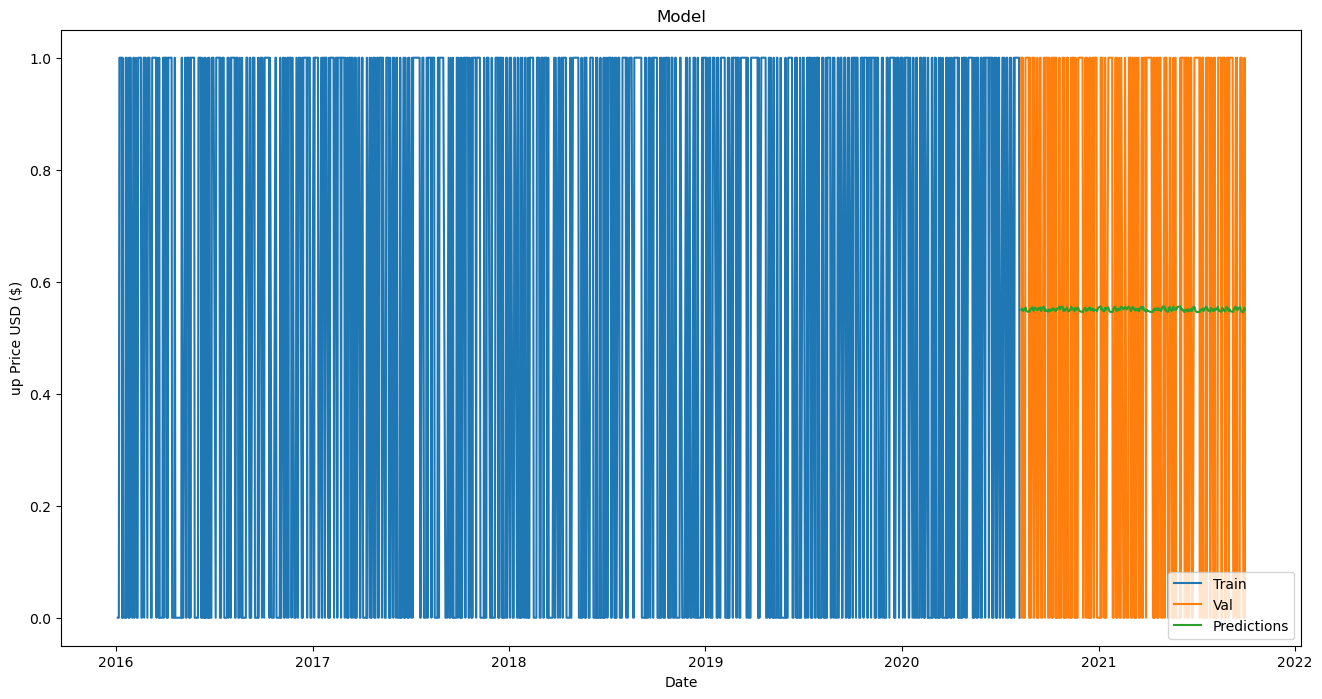

In [40]:

data = stock_data.filter(['up'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('up Price USD ($)')
plt.plot(train)
plt.plot(validation[['up', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
pip install tensorflow

In [ ]:
pip install yfinance

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
origin, today = "2019-01-01", "2019-05-31"
rail_series = df.loc[origin:today]["rail"].asfreq("D")
model = ARIMA(rail_series, order=(1, 0, 0), seasonal_order=(0, 1, 1, 7))
model = model.fit()
y_pred = model.forecast() # returns 427,758.6

In [ ]:
origin, start_date, end_date = "2019-01-01", "2019-03-01", "2019-05-31"
time_period = pd.date_range(start_date, end_date)
rail_series = df.loc[origin:end_date]["rail"].asfreq("D")
y_preds = []
for today in time_period.shift(-1):
 model = ARIMA(rail_series[origin:today], # train on data up to "today"
 order=(1, 0, 0),
 seasonal_order=(0, 1, 1, 7))
 model = model.fit() # note that we retrain the model every day!
 y_pred = model.forecast()[0]
 y_preds.append(y_pred)
y_preds = pd.Series(y_preds, index=time_period)
mae = (y_preds - rail_series[time_period]).abs().mean() # returns 32,040.7

Keras actually has a nice utility function called tf.keras.utils.timeseries_
dataset_from_array() to help us prepare the training set. It takes a time series
as input, and it builds a tf.data.Dataset (introduced in Chapter 13) containing all
the windows of the desired length, as well as their corresponding targets. Here’s an
example that takes a time series containing the numbers 0 to 5 and creates a dataset
containing all the windows of length 3, with their corresponding targets, grouped
into batches of size 2: